# Census Income
### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- 1.	A single cell estimate of the population 16+ for each state.
- 2.	Controls for Hispanic Origin by age and sex.
- 3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv



### Import Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

### Load DataSet

In [2]:
df = pd.read_csv('census_income.csv')

In [3]:
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
28966,75,?,125784,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,8,United-States,<=50K
21274,27,Local-gov,162973,Assoc-voc,11,Never-married,Protective-serv,Not-in-family,White,Male,0,0,56,United-States,<=50K
32532,29,Private,125976,HS-grad,9,Separated,Sales,Unmarried,White,Female,0,0,35,United-States,<=50K
5102,23,Local-gov,115244,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K
18763,59,Private,38573,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


### EDA(Exploratory Data Analysis)

In [4]:
#Renaming Columns name
df.rename(columns={'age':'Age','workclass':'Workclass','fnlwgt':'Final_weight','education':'Education','education.num':'Education_num','marital.status':'Marital_status','occupation':'Occupation','relationship':'Relationship','race':'Race','sex':'Sex','capital.gain':'Capital_gain','capital.loss':'Capital_loss','hours.per.week':'Hours_per_week','native.country':'Native_country','income':'Income'}, inplace=True)

In [5]:
df

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### Looking at the income column shows that its data is not in the correct format

In [6]:
# Replace income value more than 50k with 1 and less than 50k with 0.
df['Income'] =df['Income'].str.strip()
df['Income'].replace({'<=50K': 0, '>50K': 1}, inplace=True)

In [7]:
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [8]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 32561 rows and 15 columns respectively present in the dataset.


In [9]:
# checking columns in Dataset
print("These are the columns present in the dataset:  \n\n",df.columns)

These are the columns present in the dataset:  

 Index(['Age', 'Workclass', 'Final_weight', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')


In [10]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 24 duplicates present in the dataset


In [11]:
#Dropping Duplocate values
df.drop_duplicates(inplace=True)

In [12]:
#Checking Duplicates
df.duplicated().sum()

0

In [13]:
# checking null values in the dataset
print("There are {} Nulls present in the dataset".format(df.isnull().sum().sum()))

There are 0 Nulls present in the dataset


<AxesSubplot:>

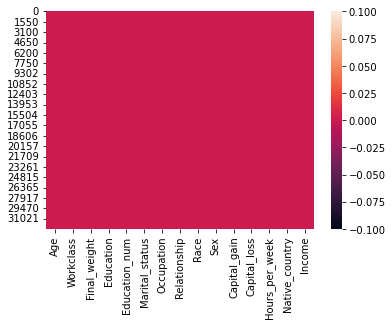

In [14]:
# Heatmap of null values
sns.heatmap(df.isnull())

Observation:

There are no Null Values are present in dataset

In [15]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32537 non-null  int64 
 1   Workclass       32537 non-null  object
 2   Final_weight    32537 non-null  int64 
 3   Education       32537 non-null  object
 4   Education_num   32537 non-null  int64 
 5   Marital_status  32537 non-null  object
 6   Occupation      32537 non-null  object
 7   Relationship    32537 non-null  object
 8   Race            32537 non-null  object
 9   Sex             32537 non-null  object
 10  Capital_gain    32537 non-null  int64 
 11  Capital_loss    32537 non-null  int64 
 12  Hours_per_week  32537 non-null  int64 
 13  Native_country  32537 non-null  object
 14  Income          32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


#### Dataset Information

The dataset contains information about individuals and their income. Below are some key observations:

- **Number of Rows:** There are 32,537 rows in the dataset.

- **Columns:** The dataset comprises 15 columns.

- **Data Types:** The dataset has two main data types:
  - `int64` for numeric columns (7 columns)
  - `object` for categorical columns (8 columns)

- **Missing Values:** There are no missing values in any of the columns; all columns have non-null values.

- **Column Names:** The column names provide information about different attributes, including `age`, `workclass`, `education`, `marital.status`, `occupation`, `relationship`, `race`, `sex`, `capital.gain`, `capital.loss`, `hours.per.week`, `native.country`, and `income`.

- **Memory Usage:** The dataset consumes approximately 4.0+ MB of memory.

This initial dataset examination reveals that it is relatively clean, with no missing values, and it contains both numeric and categorical features related to individuals and their income.


In [16]:
# checking number of unique values in each column
df.nunique()

Age                  73
Workclass             9
Final_weight      21648
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

### Number of Unique Values in Each Column

Here are the number of unique values in each column of the dataset:

- **age:** 73 unique values.
- **workclass:** 9 unique values.
- **fnlwgt:** 21,648 unique values.
- **education:** 16 unique values.
- **education.num:** 16 unique values.
- **marital.status:** 7 unique values.
- **occupation:** 15 unique values.
- **relationship:** 6 unique values.
- **race:** 5 unique values.
- **sex:** 2 unique values.
- **capital.gain:** 119 unique values.
- **capital.loss:** 92 unique values.
- **hours.per.week:** 94 unique values.
- **native.country:** 42 unique values.
- **income:** 2 unique values.

#### Important Observations

1. **Categorical Features:** Several columns, such as `workclass`, `education`, `marital.status`, `occupation`, `relationship`, `race`, `sex`, and `native.country`, have a relatively small number of unique values, which suggests that they are categorical or nominal features.

2. **Binary Features:** The `sex` and `income` columns have only 2 unique values each, indicating that they are binary variables.

3. **Numeric Features:** Some columns, like `age`, `fnlwgt`, `capital.gain`, `capital.loss`, and `hours.per.week`, have a larger number of unique values, which suggests that they are numeric features.

4. **Education Related Features:** Both `education` and `education.num` columns represent education-related information and have the same number of unique values (16).

These observations can help in understanding the nature of the data and guide feature selection or preprocessing steps in any data analysis or machine learning tasks.


### chacking value Counts

In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

36    898
31    888
34    886
23    876
35    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
**************************************************
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64
**************************************************
203488    13
164190    13
123011    13
113364    12
148995    12
          ..
137952     1
169955     1
45487      1
183522     1
257302     1
Name: Final_weight, Length: 21648, dtype: int64
**************************************************
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th

In [18]:
def find_features_with_missing_values(data):
    # Replace characters with NaN
    replace_chars = ["\n", "\n?\n", "?","\n?"," ?","? "," ? "," ?\n"]
    if any(char in data.values for char in replace_chars):
        data.replace(replace_chars, np.nan, inplace=True)
        print("Successfully replaced characters with NaN.")
    
    # Find features with missing values
    features_with_null = [feature for feature in data.columns if data[feature].isnull().sum() > 0]
    if not features_with_null:
        print("No missing values found in any features.")
    else:
        for feature in features_with_null:
            print(f"{feature}: {round(data[feature].isnull().mean() * 100, 2)}%")
    return features_with_null

In [19]:
find_features_with_missing_values(df)

Successfully replaced characters with NaN.
Workclass: 5.64%
Occupation: 5.66%
Native_country: 1.79%


['Workclass', 'Occupation', 'Native_country']

### Filling Null values

In [20]:
# Imputating Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [21]:
find_features_with_missing_values(df)

No missing values found in any features.


[]

In [22]:
# Clean up occupation column by removing any leading/trailing spaces
df['Occupation'] = df['Occupation'].str.strip()
# Replace occupation categories with new categories
df['New_occupation'] = df['Occupation'].replace({
    'Prof-specialty': 'Professional_Managerial',
    'Craft-repair': 'Skilled_Technical',
    'Exec-managerial': 'Professional_Managerial',
    'Adm-clerical': 'Sales_Administrative',
    'Sales': 'Sales_Administrative',
    'Other-service': 'Service_Care',
    'Machine-op-inspct': 'Skilled_Technical',
    'Missing': 'Unclassified Occupations',
    'Transport-moving': 'Skilled_Technical',
    'Handlers-cleaners': 'Service_Care',
    'Farming-fishing': 'Service_Care',
    'Tech-support': 'Skilled_Technical',
    'Protective-serv': 'Professional_Managerial',
    'Priv-house-serv': 'Service_Care',
    'Armed-Forces': 'Unclassified Occupations',
})

# Check value counts of new occupation column
df.drop(['Occupation'], axis=1,inplace=True)
print(f"New narrowed categories : \n{df['New_occupation'].value_counts()}")

New narrowed categories : 
Professional_Managerial     10693
Skilled_Technical            8618
Sales_Administrative         7418
Service_Care                 5799
Unclassified Occupations        9
Name: New_occupation, dtype: int64


In [23]:
# Statistical Understanding
df.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


### Statistical Understanding

The following statistics provide insights into the numerical columns of the dataset:

- **Age:**
  - The mean age of individuals in the dataset is approximately 38.59 years.
  - The minimum age is 17 years, while the maximum age is 90 years.
  - The age distribution appears to be relatively balanced, with no extreme outliers.

- **Fnlwgt:**
  - The mean final weight (fnlwgt) is approximately 189,780.
  - The minimum fnlwgt is 12,285, while the maximum fnlwgt is 1,484,705.
  - The fnlwgt distribution appears to have a wide range of values.

- **Education_num:**
  - The mean education number is approximately 10.08.
  - Education number varies from a minimum of 1 to a maximum of 16.
  - This likely represents the number of years of education or a similar educational metric.

- **Capital_gain:**
  - The mean capital gain is approximately 1,078.44.
  - The majority of individuals appear to have zero capital gain, as indicated by the 25th and 50th percentiles.
  - However, there are significant outliers, with a maximum capital gain of 99,999.

- **Capital_loss:**
  - The mean capital loss is approximately 87.37.
  - Similar to capital gain, most individuals seem to have zero capital loss.
  - The maximum capital loss is 4,356, indicating potential outliers.

- **Hours_per_week:**
  - The mean number of hours worked per week is approximately 40.44.
  - The distribution of hours worked appears relatively typical, with a minimum of 1 hour and a maximum of 99 hours.

- **Income:**
  - This binary variable indicates whether an individual's income is above or below a certain threshold.
  - The mean income suggests that approximately 24.09% of individuals in the dataset have income above the threshold.

### Important Observations

1. **Age Distribution:** The age distribution of individuals in the dataset appears to be reasonably diverse, covering a broad range from 17 to 90 years.

2. **Capital Gain and Capital Loss:** Both capital gain and capital loss columns have a substantial number of zero values, but they also contain significant outliers with high values.

3. **Income Distribution:** The dataset is imbalanced with respect to income, as a majority of individuals have incomes below the threshold (0), while a smaller percentage have incomes above the threshold (1).

4. **Education Number:** The education number appears to be a discrete numerical feature, likely representing the number of years of education.

5. **Hours Worked:** The distribution of hours worked per week seems to follow a typical pattern, with most individuals working around 40 hours per week.

These observations provide an initial understanding of the dataset's numerical features and highlight potential areas of interest or concern for further analysis.


In [24]:
#Here i am drooping Education Columns because We have Education Number
df.drop(['Education'], axis=1,inplace=True)

In [25]:
#Checking Skewness
skewness = df.skew()
skewness

Age                0.557663
Final_weight       1.447703
Education_num     -0.309500
Capital_gain      11.949403
Capital_loss       4.592702
Hours_per_week     0.228759
Income             1.211687
dtype: float64

In [26]:
#Saperating Categorical And Numerical Columns
Categorical = []
Numerical = []
for i in df.columns:
    if df[i].dtypes == "O":
        Categorical.append(i)
    else:
        Numerical.append(i)
        

In [27]:
Categorical

['Workclass',
 'Marital_status',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'New_occupation']

In [28]:
Numerical

['Age',
 'Final_weight',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Income']

## Taking Insigts By Visualizing The Data

#### Workclass

In [29]:
df['Workclass'].value_counts()

Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

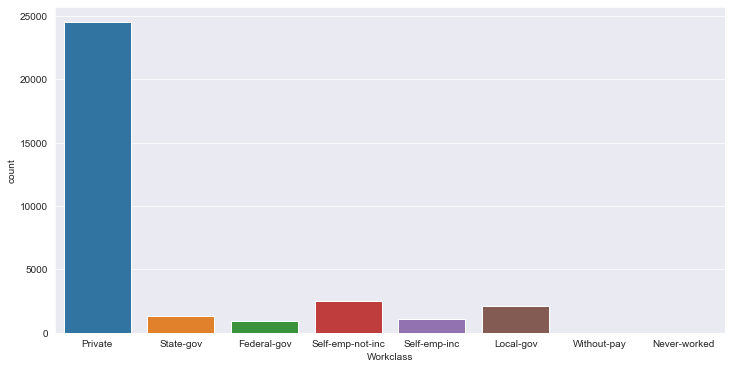

In [30]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.countplot(x='Workclass', data=df)
plt.show()

In [31]:
df.groupby('Workclass')['Income'].value_counts()

Workclass         Income
Federal-gov       0           589
                  1           371
Local-gov         0          1476
                  1           617
Never-worked      0             7
Private           0         19357
                  1          5152
Self-emp-inc      1           622
                  0           494
Self-emp-not-inc  0          1816
                  1           724
State-gov         0           945
                  1           353
Without-pay       0            14
Name: Income, dtype: int64

# Workclass vs. Income

Here is a breakdown of income levels by workclass:

- **Federal-gov:**
  - Income less than 50k: 589 individuals
  - Income greater than 50k: 371 individuals

- **Local-gov:**
  - Income less than 50k: 1,476 individuals
  - Income greater than 50k: 617 individuals

- **Never-worked:**
  - Income less than 50k: 7 individuals

- **Private:**
  - Income less than 50k: 19,357 individuals
  - Income greater than 50k: 5,152 individuals

- **Self-emp-inc:**
  - Income greater than 50k: 622 individuals
  - Income less than 50k: 494 individuals

- **Self-emp-not-inc:**
  - Income less than 50k: 1,816 individuals
  - Income greater than 50k: 724 individuals

- **State-gov:**
  - Income less than 50k: 945 individuals
  - Income greater than 50k: 353 individuals

- **Without-pay:**
  - Income less than 50k: 14 individuals

These counts provide insights into the distribution of income levels within each workclass category. It's evident that the 'Private' workclass has a relatively large number of individuals with incomes both above and below 50k, while some other categories, such as 'Never-worked' and 'Without-pay,' have very few individuals.


In [32]:
df.groupby('Workclass')['Sex'].value_counts()

Workclass         Sex   
Federal-gov       Male        645
                  Female      315
Local-gov         Male       1258
                  Female      835
Never-worked      Male          5
                  Female        2
Private           Male      15927
                  Female     8582
Self-emp-inc      Male        981
                  Female      135
Self-emp-not-inc  Male       2141
                  Female      399
State-gov         Male        809
                  Female      489
Without-pay       Male          9
                  Female        5
Name: Sex, dtype: int64

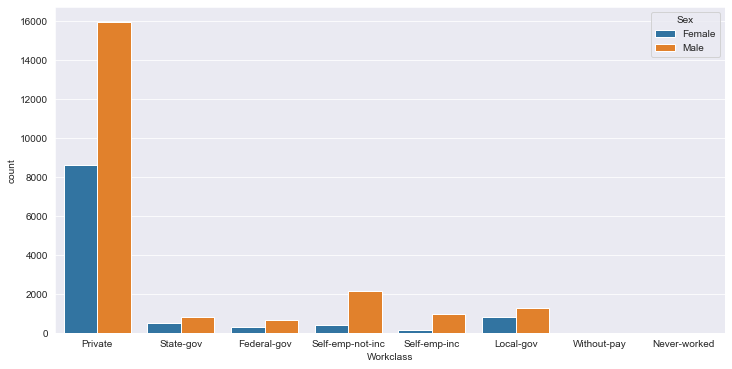

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot('Workclass',hue='Sex',data=df)
plt.show()

#### Gender Distribution by Workclass

Here is the distribution of gender (sex) within each workclass category:

- **Federal-gov:**
  - Male: 645 individuals
  - Female: 315 individuals

- **Local-gov:**
  - Male: 1,258 individuals
  - Female: 835 individuals

- **Never-worked:**
  - Male: 5 individuals
  - Female: 2 individuals

- **Private:**
  - Male: 15,927 individuals
  - Female: 8,582 individuals

- **Self-emp-inc:**
  - Male: 981 individuals
  - Female: 135 individuals

- **Self-emp-not-inc:**
  - Male: 2,141 individuals
  - Female: 399 individuals

- **State-gov:**
  - Male: 809 individuals
  - Female: 489 individuals

- **Without-pay:**
  - Male: 9 individuals
  - Female: 5 individuals

This breakdown provides insights into the gender distribution within different workclass categories. It shows the number of males and females in each category. For example, the 'Private' workclass has a significant number of both male and female individuals, while the 'Self-emp-inc' workclass has more males than females.


### Marital_status

In [34]:
df['Marital_status'].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital_status, dtype: int64

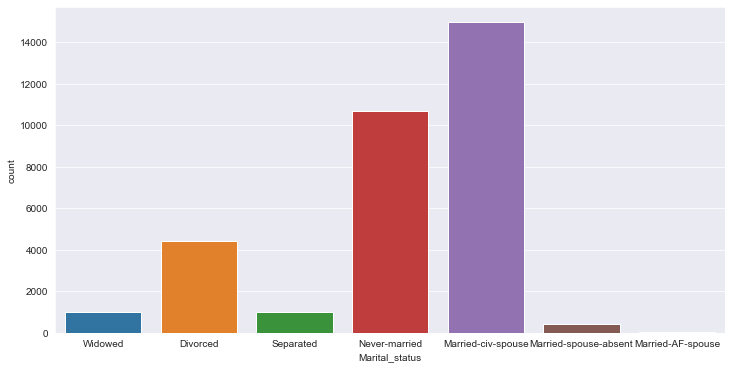

In [35]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.countplot(x='Marital_status', data=df)
plt.show()

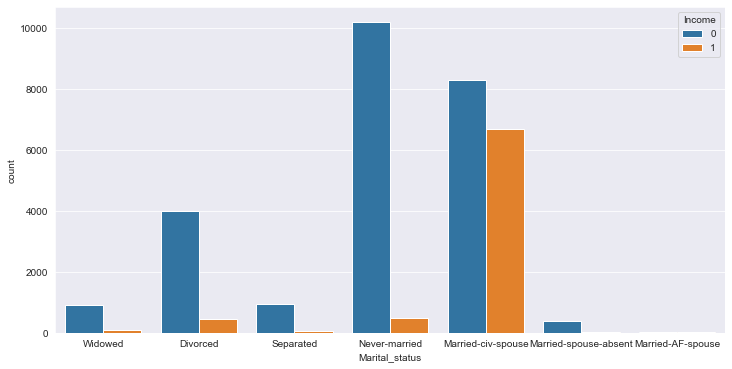

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot('Marital_status',hue='Income',data=df)
plt.show()

In [37]:
df.groupby('Marital_status')['Income'].value_counts()

Marital_status         Income
Divorced               0          3978
                       1           463
Married-AF-spouse      0            13
                       1            10
Married-civ-spouse     0          8280
                       1          6690
Married-spouse-absent  0           384
                       1            34
Never-married          0         10176
                       1           491
Separated              0           959
                       1            66
Widowed                0           908
                       1            85
Name: Income, dtype: int64

#### Income Distribution by Marital Status

The distribution of income levels within different marital status categories reveals several key observations:

1. **Married-civ-spouse:**
   - This category has the highest count of individuals with income levels greater than 50k (1), with 6,690 individuals.
   - It also has a significant number of individuals with income levels below 50k (0), with 8,280 individuals.
   - This suggests that the 'Married-civ-spouse' category has a relatively balanced distribution of income levels.

2. **Never-married:**
   - The 'Never-married' category has the highest count of individuals with income levels below 50k (0), with 10,176 individuals.
   - However, it also has a notable number of individuals with income levels greater than 50k (1), with 491 individuals.
   - This indicates some diversity in income levels within the 'Never-married' category.

3. **Divorced:**
   - The 'Divorced' category primarily consists of individuals with income levels below 50k (0), with 3,978 individuals.
   - It has a smaller number of individuals with income levels greater than 50k (1), with 463 individuals.

4. **Widowed:**
   - The 'Widowed' category is similar to 'Divorced' in that it has more individuals with income levels below 50k (0), with 908 individuals.
   - It also has some individuals with income levels greater than 50k (1), with 85 individuals.

5. **Married-spouse-absent, Separated, Married-AF-spouse:**
   - These categories generally have smaller counts of individuals, and the majority of them have income levels below 50k (0).
   - The 'Married-spouse-absent' category has a very small number of individuals with income levels greater than 50k (1).

Overall, these observations highlight that marital status can be a factor influencing income levels. 'Married-civ-spouse' and 'Never-married' categories have diverse income distributions, while other categories like 'Divorced' and 'Widowed' tend to have a higher proportion of individuals with incomes below 50k.


### Relationship

In [38]:
df['Relationship'].value_counts()

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: Relationship, dtype: int64

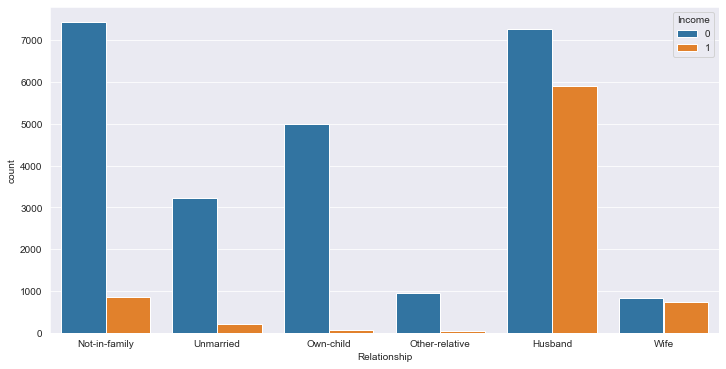

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot('Relationship',hue='Income',data=df)
plt.show()

In [40]:
df.groupby('Relationship')['Income'].value_counts()

Relationship    Income
Husband         0         7271
                1         5916
Not-in-family   0         7436
                1          856
Other-relative  0          944
                1           37
Own-child       0         4997
                1           67
Unmarried       0         3227
                1          218
Wife            0          823
                1          745
Name: Income, dtype: int64

### Income Distribution by Relationship

The distribution of income levels within different relationship categories provides the following key observations:

1. **Husband:**
   - The 'Husband' category has a substantial number of individuals with income levels both below 50k (0) and above 50k (1).
   - It has the highest count of individuals with income greater than 50k (1), with 5,916 individuals.
   - This suggests that a significant proportion of husbands in the dataset have incomes above the 50k threshold.

2. **Not-in-family:**
   - The 'Not-in-family' category primarily consists of individuals with income levels below 50k (0), with 7,436 individuals.
   - It also has a smaller number of individuals with income levels above 50k (1), with 856 individuals.
   - This category represents individuals who are not living with immediate family members, and most of them have lower incomes.

3. **Wife:**
   - Similar to husbands, the 'Wife' category has a notable number of individuals with income levels both below 50k (0) and above 50k (1).
   - It has a relatively balanced distribution of income levels, with 745 individuals having incomes greater than 50k (1).

4. **Unmarried:**
   - The 'Unmarried' category has a larger number of individuals with income levels below 50k (0) compared to those with incomes above 50k (1).
   - It represents individuals who are not married but may include individuals in various living arrangements.

5. **Other-relative and Own-child:**
   - These categories generally have a higher number of individuals with income levels below 50k (0).
   - The 'Other-relative' category has a very small number of individuals with income levels above 50k (1).
   - The 'Own-child' category also has more individuals with incomes below 50k (0) but has a few with incomes above 50k (1).

Overall, these observations highlight the variation in income levels across different relationship categories. The 'Husband' and 'Wife' categories have a significant number of individuals with incomes above 50k, suggesting that marital status and relationship roles can impact income levels in the dataset.


### Race

In [41]:
df['Race'].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [42]:
df.groupby('Race')['Income'].value_counts()

Race                Income
Amer-Indian-Eskimo  0           275
                    1            36
Asian-Pac-Islander  0           762
                    1           276
Black               0          2735
                    1           387
Other               0           246
                    1            25
White               0         20680
                    1          7115
Name: Income, dtype: int64

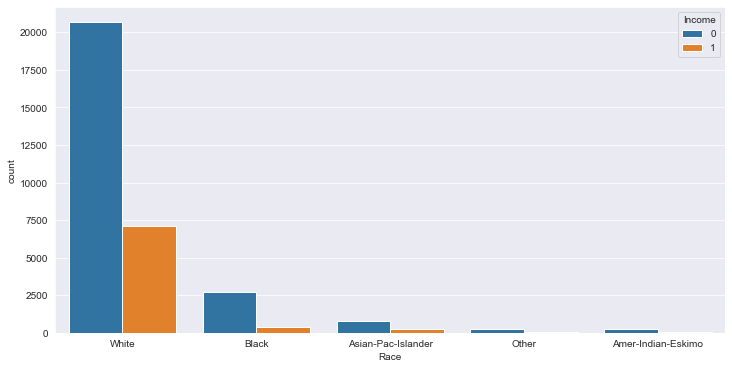

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot('Race',hue='Income',data=df)
plt.show()

### Income Distribution by Race

The distribution of income levels within different race categories reveals several key observations:

1. **White:**
   - The 'White' race category has the highest count of individuals with income levels both below 50k (0) and above 50k (1).
   - It has the highest number of individuals with income greater than 50k (1), with 7,115 individuals, and a significant number with income below 50k (0), with 20,680 individuals.
   - This suggests that the dataset contains a large number of white individuals with diverse income levels.

2. **Asian-Pac-Islander:**
   - The 'Asian-Pac-Islander' race category also has a relatively balanced distribution of income levels.
   - It has more individuals with income above 50k (1), with 276 individuals, compared to those with income below 50k (0), with 762 individuals.

3. **Black:**
   - The 'Black' race category has a higher number of individuals with income levels below 50k (0), with 2,735 individuals.
   - It also has a smaller number of individuals with income levels above 50k (1), with 387 individuals.

4. **Amer-Indian-Eskimo:**
   - The 'Amer-Indian-Eskimo' race category primarily consists of individuals with income levels below 50k (0), with 275 individuals.
   - It has a smaller number of individuals with income levels above 50k (1), with 36 individuals.

5. **Other:**
   - The 'Other' race category has a higher number of individuals with income levels below 50k (0), with 246 individuals.
   - It also has a small number of individuals with income levels above 50k (1), with 25 individuals.

These observations highlight variations in income levels across different race categories in the dataset. While the 'White' category has the highest count of individuals with both income levels, other race categories may have different distributions, with some having a higher proportion of individuals with incomes below 50k.


### Sex

In [44]:
df['Sex'].value_counts()

Male      21775
Female    10762
Name: Sex, dtype: int64

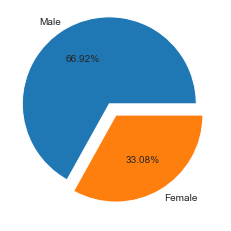

In [45]:
plt.pie(df['Sex'].value_counts().values,labels=df['Sex'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));

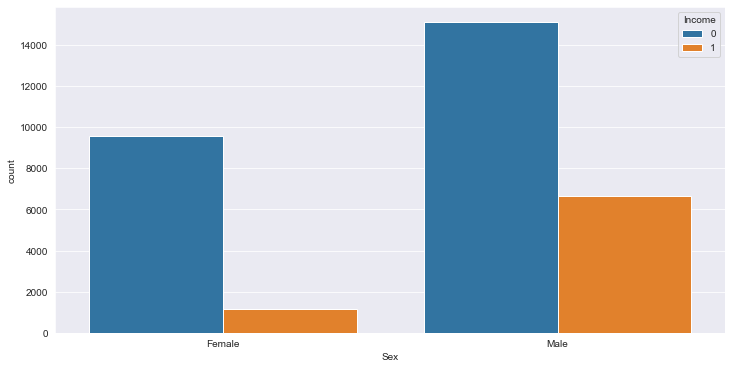

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot('Sex',hue='Income',data=df)
plt.show()

In [47]:
df.groupby('Sex')['Income'].value_counts()

Sex     Income
Female  0          9583
        1          1179
Male    0         15115
        1          6660
Name: Income, dtype: int64

#### Income Distribution by Gender (Sex)

The distribution of income levels within different gender (sex) categories provides the following key observations:

1. **Male:**
   - The 'Male' category has the highest count of individuals, both with income levels below 50k (0) and above 50k (1).
   - It has the highest number of individuals with income levels below 50k (0), with 15,115 individuals.
   - It also has a substantial number of individuals with income levels above 50k (1), with 6,660 individuals.
   - This suggests that the dataset contains a larger number of males, and there is a significant diversity in income levels among them.

2. **Female:**
   - The 'Female' category consists of a smaller number of individuals compared to 'Male.'
   - It has more individuals with income levels below 50k (0), with 9,583 individuals, than those with income levels above 50k (1), with 1,179 individuals.
   - The income distribution for females is skewed towards incomes below 50k.

These observations highlight differences in income levels between genders in the dataset. The 'Male' category has both a larger overall count and a higher count of individuals with income levels above 50k, while the 'Female' category has a larger count of individuals with income levels below 50k.

Understanding gender-related income disparities is essential for addressing gender-based income inequality in various contexts.


### Native_country

In [48]:
df['Native_country'].value_counts()

United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

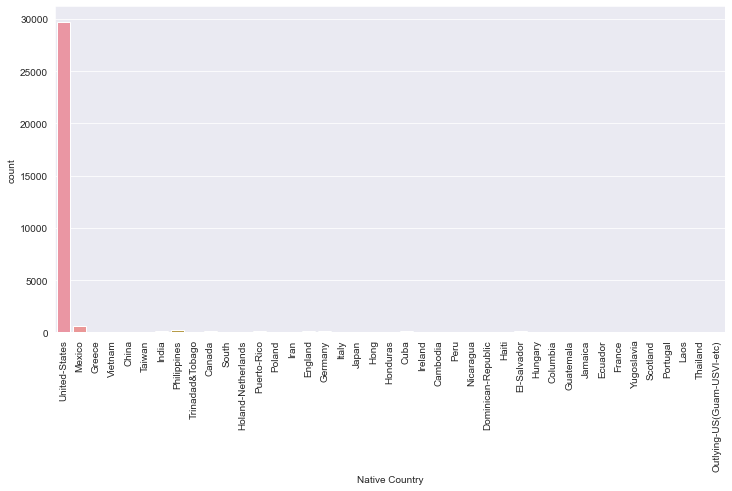

In [49]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.countplot(x='Native_country', data=df)
plt.xticks(rotation=90)
plt.xlabel("Native Country")
plt.show()

In [50]:
Categorical

['Workclass',
 'Marital_status',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'New_occupation']

### New_occupation

In [51]:
df['New_occupation'].value_counts()

Professional_Managerial     10693
Skilled_Technical            8618
Sales_Administrative         7418
Service_Care                 5799
Unclassified Occupations        9
Name: New_occupation, dtype: int64

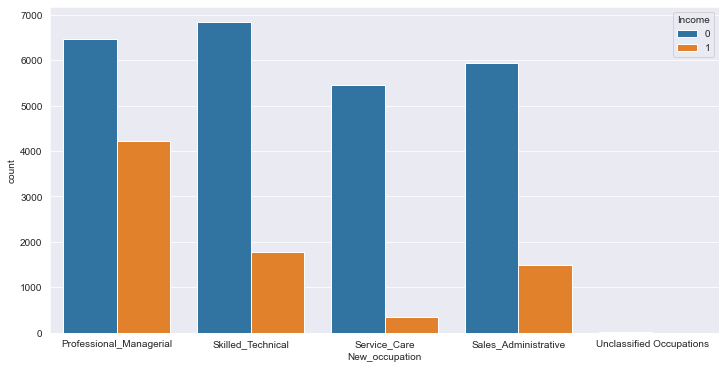

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot('New_occupation',hue='Income',data=df)
plt.show()

In [53]:
df.groupby('New_occupation')['Income'].value_counts()

New_occupation            Income
Professional_Managerial   0         6465
                          1         4228
Sales_Administrative      0         5928
                          1         1490
Service_Care              0         5460
                          1          339
Skilled_Technical         0         6837
                          1         1781
Unclassified Occupations  0            8
                          1            1
Name: Income, dtype: int64

### Income Distribution by New Occupation

The distribution of income levels within different 'New_occupation' categories provides the following key observations:

1. **Professional_Managerial:**
   - The 'Professional_Managerial' category has a substantial number of individuals with income levels both below 50k (0) and above 50k (1).
   - It has a high number of individuals with income levels above 50k (1), with 4,228 individuals.
   - This category represents professionals and managers who often have higher incomes.

2. **Sales_Administrative:**
   - The 'Sales_Administrative' category primarily consists of individuals with income levels below 50k (0), with 5,928 individuals.
   - It also has some individuals with income levels above 50k (1), with 1,490 individuals.

3. **Skilled_Technical:**
   - The 'Skilled_Technical' category, like 'Professional_Managerial,' has a relatively balanced distribution of income levels.
   - It has a notable number of individuals with income levels above 50k (1), with 1,781 individuals.

4. **Service_Care:**
   - The 'Service_Care' category primarily consists of individuals with income levels below 50k (0), with 5,460 individuals.
   - It has a smaller number of individuals with income levels above 50k (1), with 339 individuals.

5. **Unclassified Occupations:**
   - The 'Unclassified Occupations' category has a very small number of individuals with income levels below 50k (0) and only one individual with income above 50k (1).
   - This category likely represents a very specific and rare set of occupations.

These observations highlight variations in income levels across different new occupation categories. Categories like 'Professional_Managerial' and 'Skilled_Technical' have a balanced distribution of income levels, while others like 'Service_Care' are skewed towards lower incomes. The 'Unclassified Occupations' category is unique due to its small size and specific nature.


### Age

In [54]:
df['Age'].value_counts()

36    898
31    888
34    886
23    876
35    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

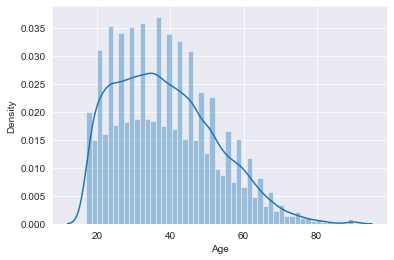

In [55]:
sns.distplot(df['Age'])

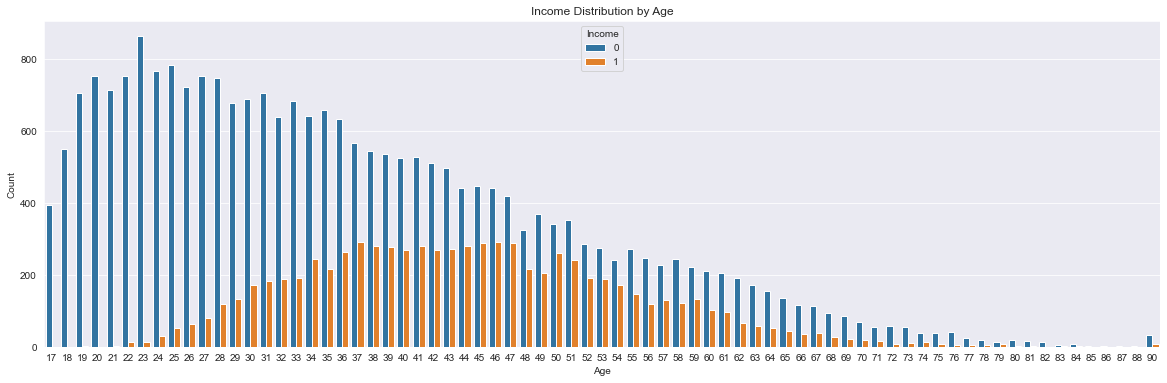

In [56]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Age', hue='Income', data=df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Income Distribution by Age')
plt.show()

### Final_weight

In [57]:
df['Final_weight'].nunique()

21648

<AxesSubplot:xlabel='Final_weight', ylabel='Density'>

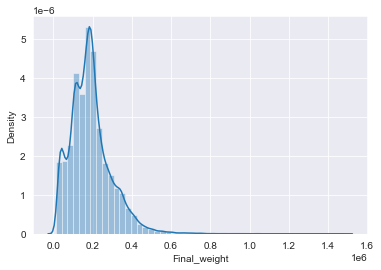

In [58]:
sns.distplot(df['Final_weight'])

Observation:

This Column is Right skewed

### Education_num

In [59]:
df['Education_num'].value_counts()

9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64

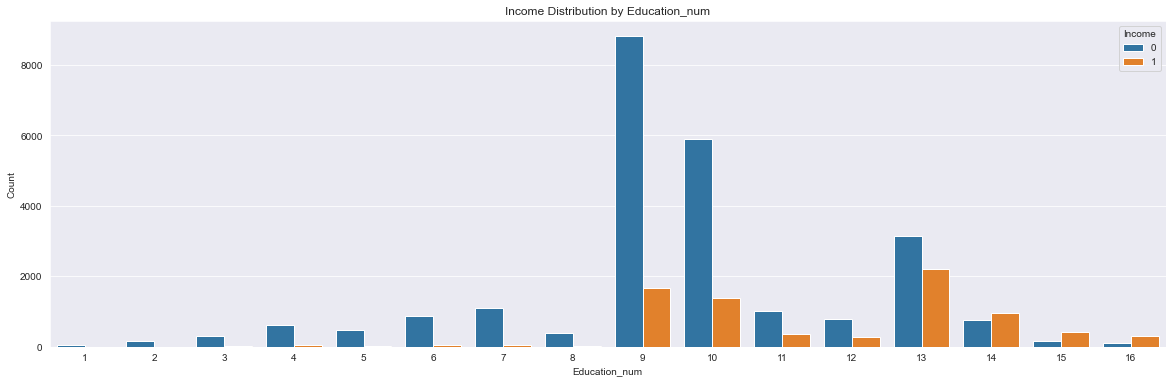

In [60]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Education_num', hue='Income', data=df)
plt.xlabel('Education_num')
plt.ylabel('Count')
plt.title('Income Distribution by Education_num')
plt.show()

Observation:

It is shown that most people with an education number of 9 have salaries less than 50k.

Conversely, those people with an education number of 13 tend to have salaries greater than 50k.

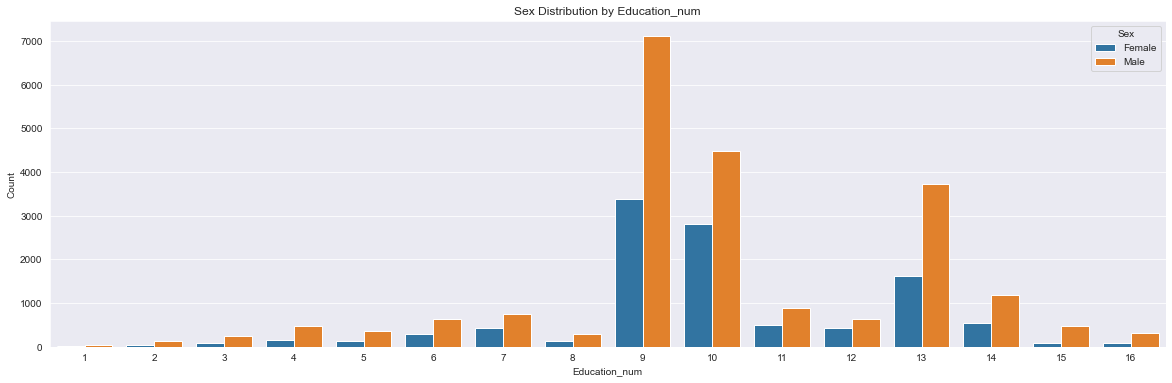

In [61]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Education_num', hue='Sex', data=df)
plt.xlabel('Education_num')
plt.ylabel('Count')
plt.title('Sex Distribution by Education_num')
plt.show()

Observation:

The maximum number of males here whose education number is 9.

### Capital_gain

In [62]:
df['Capital_gain'].nunique()

119

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

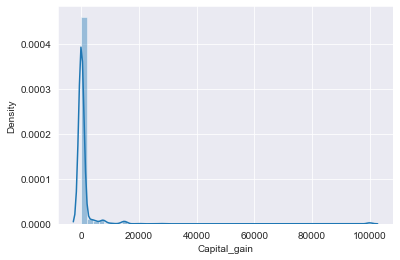

In [63]:
sns.distplot(df['Capital_gain'])

Observation:

this column is highly right skewed

### Capital_loss

In [64]:
df['Capital_loss'].nunique()

92

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

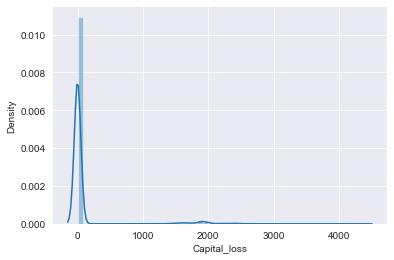

In [65]:
sns.distplot(df['Capital_loss'])

Observation:

this column is highly right skewed

### Hours_per_week

In [66]:
df['Hours_per_week'].nunique()

94

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

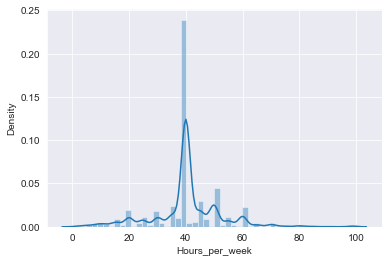

In [67]:
sns.distplot(df['Hours_per_week'])

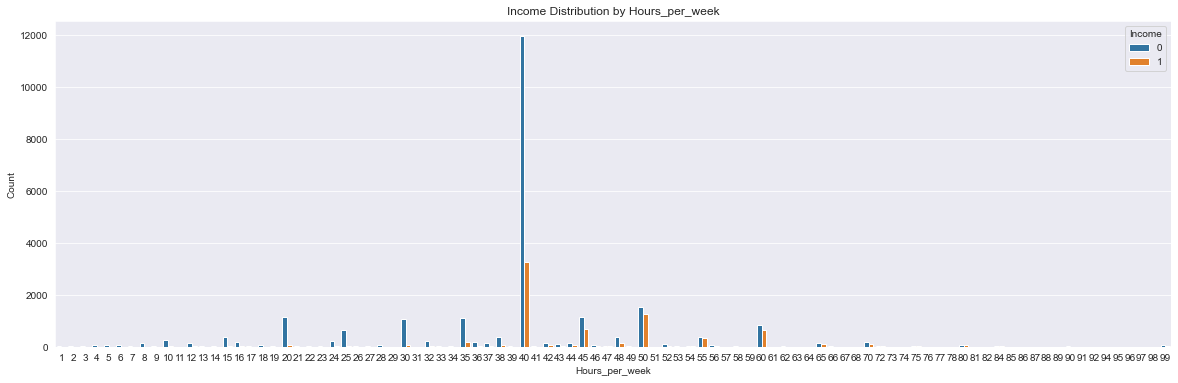

In [68]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Hours_per_week', hue='Income', data=df)
plt.xlabel('Hours_per_week')
plt.ylabel('Count')
plt.title('Income Distribution by Hours_per_week')
plt.show()

### Income

In [69]:
df['Income'].value_counts()

0    24698
1     7839
Name: Income, dtype: int64

Observation:

Target column is looking Imbalanced

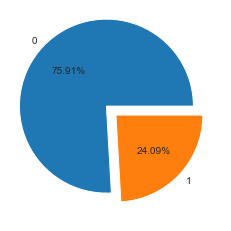

In [70]:
plt.pie(df['Income'].value_counts().values,labels=df['Income'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));

### Distribution plot for Seeing Data Distribution

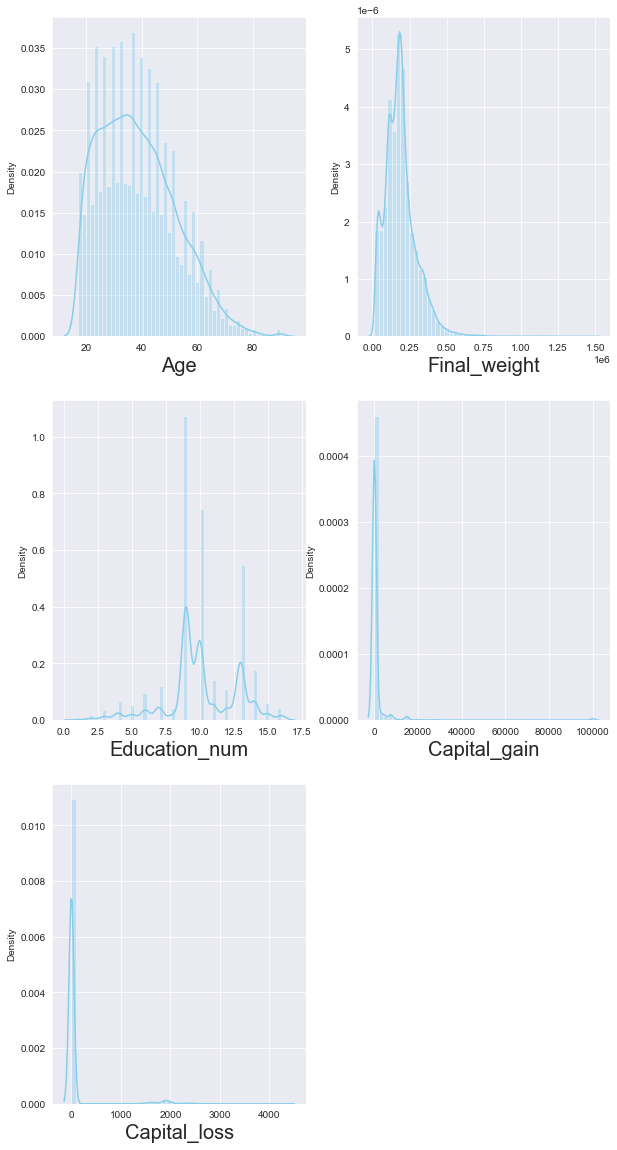

In [71]:
plt.figure(figsize = (10,20), facecolor = 'white')
plotnumber = 1

for column in Numerical:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

In [72]:
Categorical

['Workclass',
 'Marital_status',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'New_occupation']

### BoxPlot for seeing Outliers

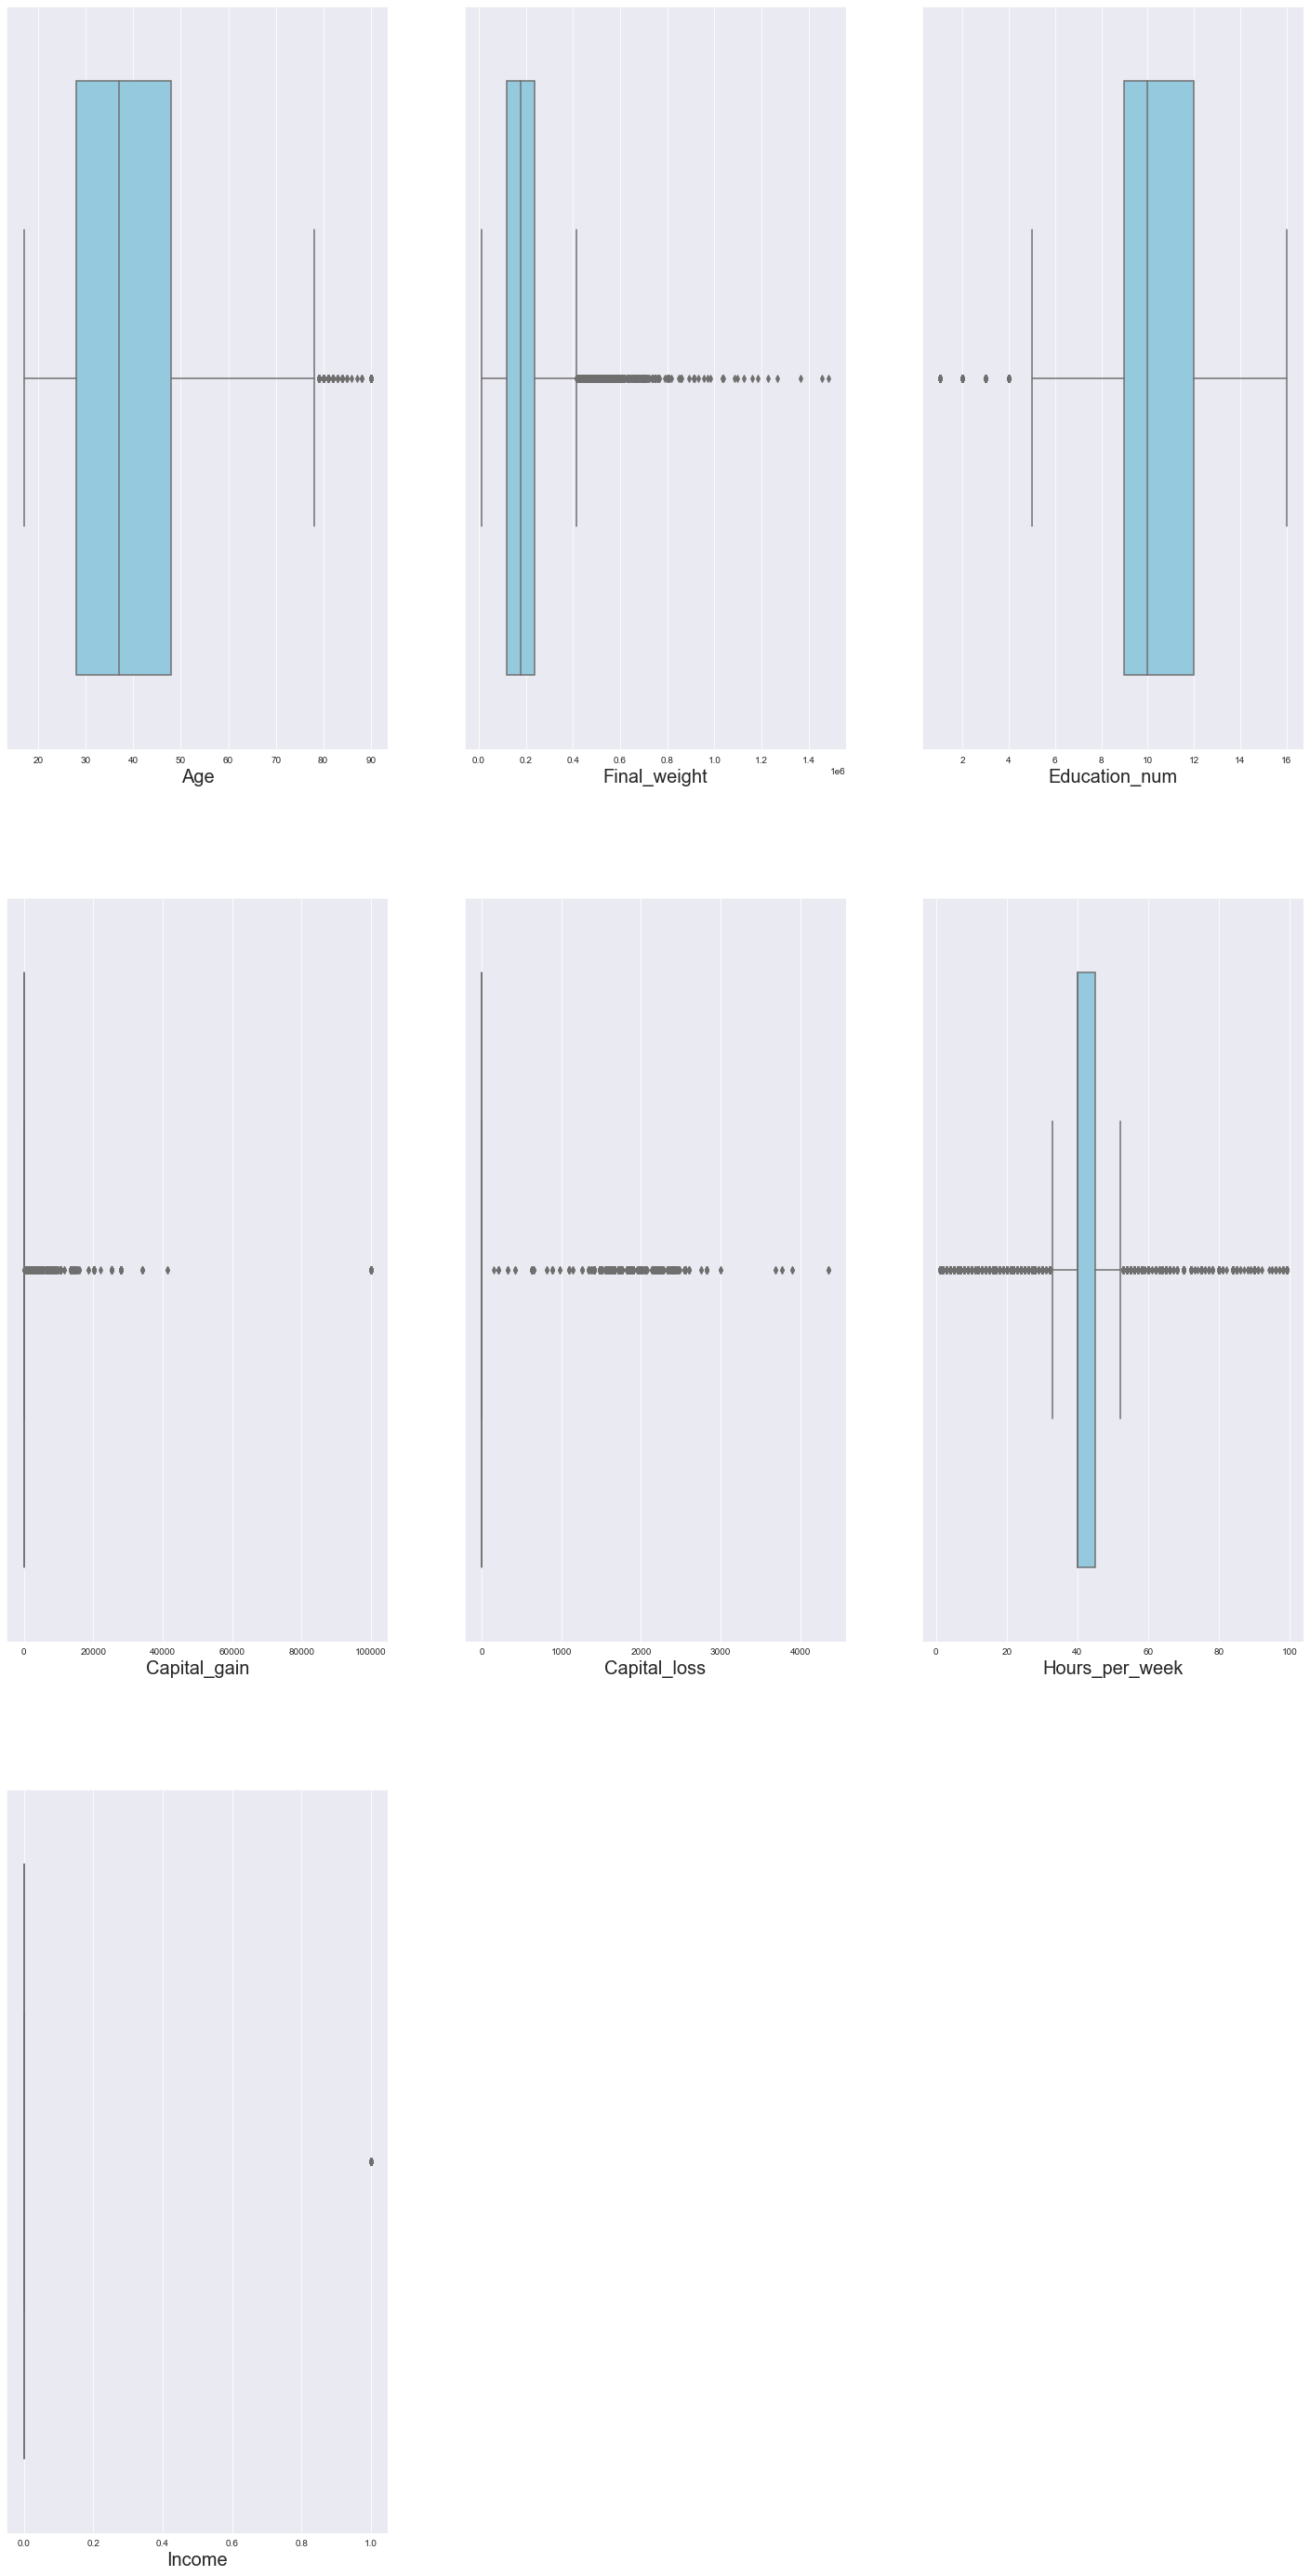

In [73]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in Numerical:
    if plotnumber <=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

The outliers are present in every column

### Multivariate Analysis

### Pair plot

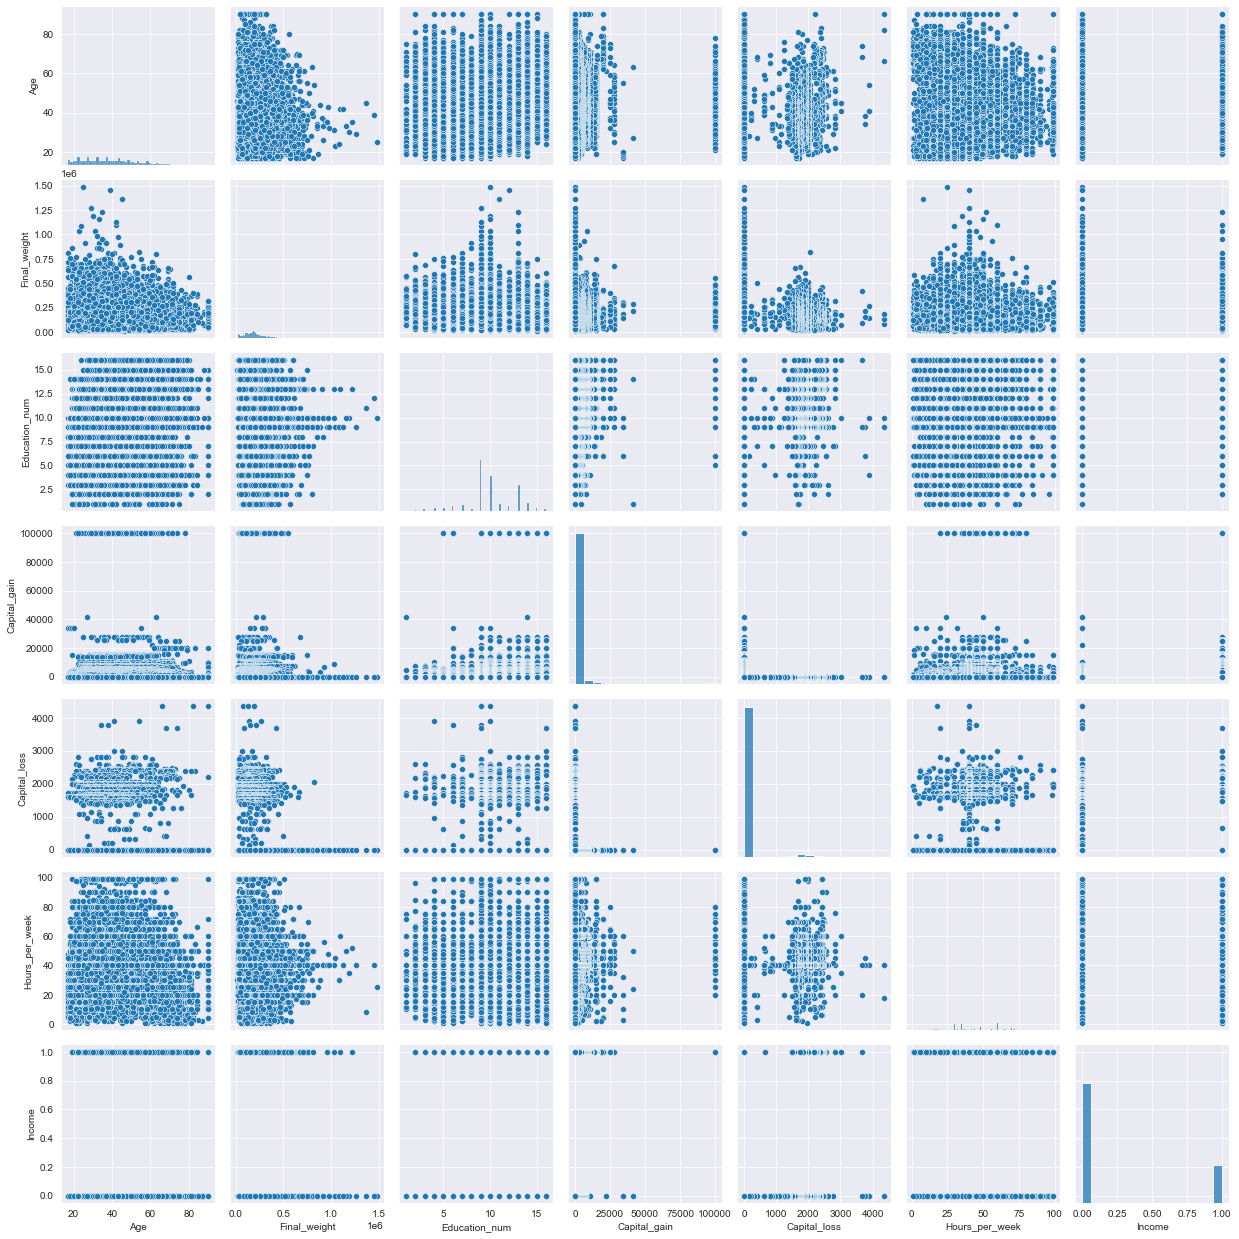

In [74]:
sns.pairplot(df)

### Cleaning Data

#### 1.Encoding the categorical columns using Label Encoding

In [75]:
categorical_col  =['Workclass',
 'Marital_status',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'New_occupation']

In [76]:
LE = LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)

In [77]:
df.head()

,Age,Workclass,Final_weight,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,New_occupation
0,90,3,77053,9,6,1,4,0,0,4356,40,38,0,0
1,82,3,132870,9,6,1,4,0,0,4356,18,38,0,0
2,66,3,186061,10,6,4,2,0,0,4356,40,38,0,0
3,54,3,140359,4,0,4,4,0,0,3900,40,38,0,3
4,41,3,264663,10,5,3,4,0,0,3900,40,38,0,0


#### 2.Handling Outliers

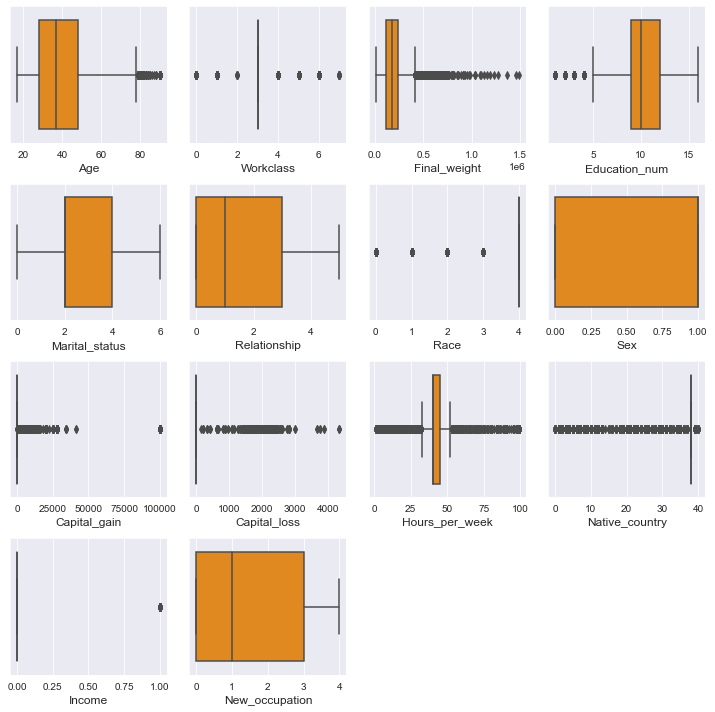

In [78]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

##### Handling Outliers By Z score

In [79]:
df.shape

(32537, 14)

In [80]:
clolumns_to_be_handle = df[['Age','Capital_gain','Capital_loss','Final_weight','Native_country','Hours_per_week']]

In [81]:
z=np.abs(zscore(clolumns_to_be_handle))
z

,Age,Capital_gain,Capital_loss,Final_weight,Native_country,Hours_per_week
0,3.770003,0.145975,10.589625,1.067955,0.261131,0.035664
1,3.183397,0.145975,10.589625,0.539159,0.261131,1.817516
2,2.010185,0.145975,10.589625,0.035241,0.261131,0.035664
3,1.130276,0.145975,9.458380,0.468210,0.261131,0.035664
4,0.177041,0.145975,9.458380,0.709415,0.261131,0.035664
...,...,...,...,...,...,...
32556,1.216148,0.145975,0.216743,1.140366,0.261131,0.035664
32557,0.849519,0.145975,0.216743,0.639678,0.261131,0.197650
32558,0.103716,0.145975,0.216743,0.335436,0.261131,0.035664
32559,1.423579,0.145975,0.216743,0.358779,0.261131,0.035664


In [82]:
df= df[(z<3).all(axis=1)]
df

,Age,Workclass,Final_weight,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,New_occupation
1470,62,1,159908,13,2,5,4,0,0,1258,38,38,0,1
1471,72,1,144515,16,2,0,4,1,0,1258,40,38,0,0
1472,76,3,224680,15,2,0,4,1,0,1258,20,38,0,0
1473,66,3,350498,10,2,0,4,1,0,1258,20,38,0,3
1474,33,1,262042,9,0,3,4,0,0,1138,40,38,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,10,4,1,4,1,0,0,40,38,0,0
32557,27,3,257302,12,2,5,4,0,0,0,38,38,0,3
32558,40,3,154374,9,2,0,4,1,0,0,40,38,1,3
32559,58,3,151910,9,6,4,4,0,0,0,40,38,0,1


In [83]:
# Calculate the percentage of data loss
original_rows = 32537  
new_rows = 28978 

data_loss_percentage = ((original_rows - new_rows) / original_rows) * 100

print(f"Data Loss Percentage: {data_loss_percentage:.2f}%")


Data Loss Percentage: 10.94%


#### Heat Map

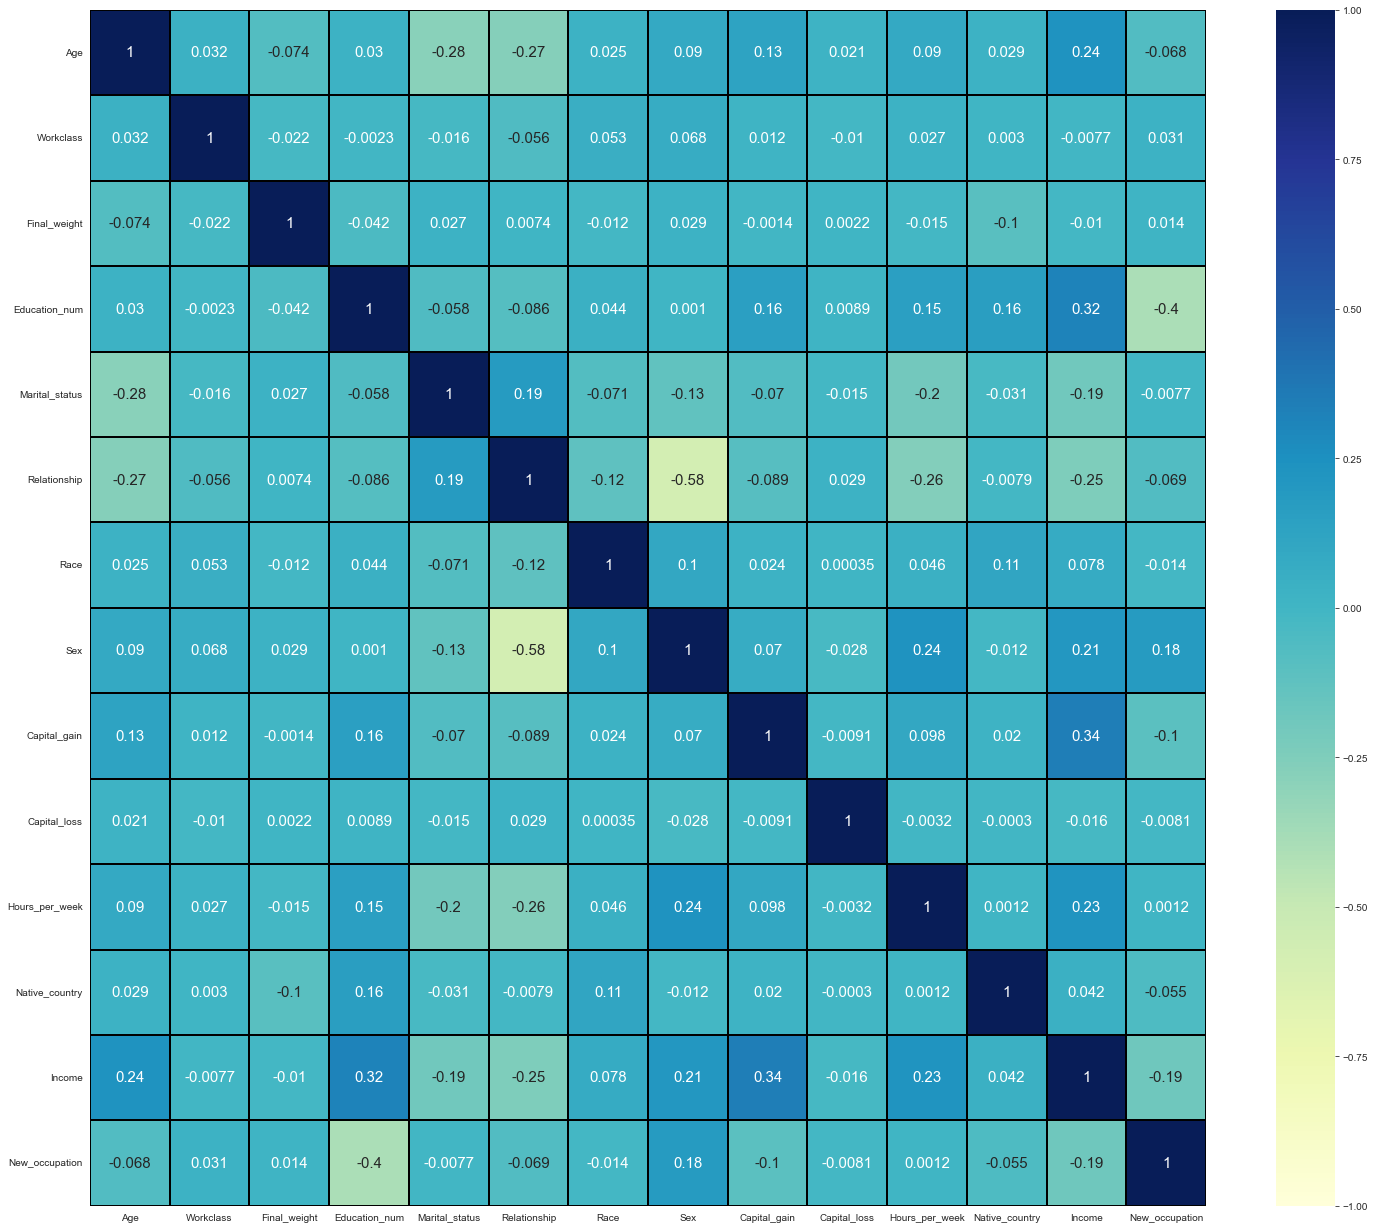

In [84]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

##### 3.Checking Correlation with Target Column

In [85]:
#correlation with target column
correlation_with_quality = df.corr()['Income'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Income            1.000000
Capital_gain      0.343701
Education_num     0.316826
Relationship      0.246028
Age               0.238359
Hours_per_week    0.231653
Sex               0.209216
Marital_status    0.194210
New_occupation    0.186726
Race              0.078000
Native_country    0.042223
Capital_loss      0.016479
Final_weight      0.009984
Workclass         0.007748
Name: Income, dtype: float64


<AxesSubplot:>

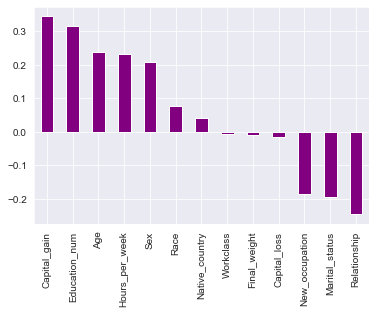

In [86]:
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar', color='purple')

Looking at this we find Workclass Final Weight And Capital loss are very less correlated with target Column, so we will remove them

In [87]:
# dropping irrelevant columns
df.drop(columns = ['Final_weight','Workclass','Capital_loss'],axis=1,inplace=True)

##### 4.Checking Correlation between columns to columns

In [88]:
#schecking correlation
df_corr = df.corr()
df_corr

,Age,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income,New_occupation
Age,1.000000,0.030311,-0.284695,-0.269294,0.024777,0.089710,0.128519,0.090397,0.028679,0.238359,-0.068257
Education_num,0.030311,1.000000,-0.057908,-0.085640,0.043935,0.001005,0.155428,0.152127,0.156667,0.316826,-0.399503
Marital_status,-0.284695,-0.057908,1.000000,0.186123,-0.070648,-0.125995,-0.069547,-0.197139,-0.031203,-0.194210,-0.007678
Relationship,-0.269294,-0.085640,0.186123,1.000000,-0.124421,-0.576110,-0.089034,-0.258632,-0.007886,-0.246028,-0.068509
Race,0.024777,0.043935,-0.070648,-0.124421,1.000000,0.099597,0.023820,0.046377,0.112263,0.078000,-0.013516
Sex,0.089710,0.001005,-0.125995,-0.576110,0.099597,1.000000,0.069815,0.235526,-0.011990,0.209216,0.181445
Capital_gain,0.128519,0.155428,-0.069547,-0.089034,0.023820,0.069815,1.000000,0.097712,0.019829,0.343701,-0.104019
Hours_per_week,0.090397,0.152127,-0.197139,-0.258632,0.046377,0.235526,0.097712,1.000000,0.001225,0.231653,0.001151
Native_country,0.028679,0.156667,-0.031203,-0.007886,0.112263,-0.011990,0.019829,0.001225,1.000000,0.042223,-0.054512
Income,0.238359,0.316826,-0.194210,-0.246028,0.078000,0.209216,0.343701,0.231653,0.042223,1.000000,-0.186726


###### We are writing this function to see those columns which are highly correlated with each other

In [89]:
correlation_threshold = 0.80
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [90]:
features_to_drop

set()

### VIF

In [91]:
df1=df.copy()

In [92]:
#drop target column
df1.drop('Income',axis=1, inplace=True)

In [93]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df1)

In [94]:
standard=pd.DataFrame(standard, columns=df1.columns)

In [95]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

,features,vif
0,Age,1.180584
1,Education_num,1.278684
2,Marital_status,1.137164
3,Relationship,1.668706
4,Race,1.033316
5,Sex,1.578245
6,Capital_gain,1.051278
7,Hours_per_week,1.137224
8,Native_country,1.039465
9,New_occupation,1.253503


There is no Multicollinearty we are good to go For Prediction

### Splitting into Feature and Target column

In [96]:
X= df.drop('Income', axis=1)
Y=df['Income']

#### removing Skewness

In [97]:
X.skew()

Age               0.489288
Education_num    -0.288096
Marital_status   -0.048267
Relationship      0.744841
Race             -2.506414
Sex              -0.684423
Capital_gain      4.942664
Hours_per_week   -0.351607
Native_country   -4.718418
New_occupation    0.153084
dtype: float64

```Age:``` The skewness is relatively low (0.49), and you may not need to apply a transformation.

```Education_num:``` The skewness is close to zero (-0.29), indicating it's not highly skewed. You may choose to leave it as is.

```Marital_status:``` The skewness is close to zero (-0.05), indicating it's not highly skewed. You may choose to leave it as is.

```Relationship:``` The skewness is relatively high (0.74). Consider applying a transformation like the logarithmic or square root transformation to reduce skewness.

```Race:``` The skewness is very high (-2.51). You should investigate this column further and consider if it makes sense to use it in your analysis or modeling. If you decide to keep it, you may need to encode it differently or transform it.

```Sex:``` The skewness is relatively low (-0.68), and you may not need to apply a transformation.

```Capital_gain:``` The skewness is very high (4.94). This column is highly skewed, and you should definitely apply a transformation, such as a logarithmic transformation, to reduce skewness.

```Hours_per_week:``` The skewness is relatively low (-0.35), and you may not need to apply a transformation.

```Native_country:``` The skewness is very high (-4.72). Similar to the 'Race' column, you should investigate whether to keep it in your analysis or modeling. If you decide to keep it, you may need to encode it differently or transform it.

```New_occupation:``` The skewness is relatively low (0.15), and you may not need to apply a transformation.

##### Transformed by Power Transformer

In [98]:
skew = ['Relationship','Race','Capital_gain','Native_country']

In [99]:
transformed=power_transform(X[skew].values)

In [100]:
pd.DataFrame(transformed).skew()

0    0.105828
1   -2.063094
2    3.080318
3    0.031403
dtype: float64

### Standardization

In [101]:
sc=StandardScaler()

In [102]:
X=sc.fit_transform(transformed)

### Data Balancing

In [103]:
sm=SMOTE()

In [104]:
x,y=sm.fit_resample(X,Y)

In [105]:
x.shape , y.shape

((45084, 4), (45084,))

## Model Training

#### Find best Randomstate

In [106]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.758123544416103 on Random State = 121


In [107]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

### Defining All Classification Models

In [108]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGD_model= SGDClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGD_model,ADA_model,GB_model ]

In [109]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 75.8123544416103
Confusion Matrix of  LogisticRegression()  is 
 [[3168 1330]
 [ 851 3668]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      4498
           1       0.73      0.81      0.77      4519

    accuracy                           0.76      9017
   macro avg       0.76      0.76      0.76      9017
weighted avg       0.76      0.76      0.76      9017

******************************
Accuracy_Score of  RidgeClassifier() is 75.15803482311189
Confusion Matrix of  RidgeClassifier()  is 
 [[3178 1320]
 [ 920 3599]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      4498
           1       0.73      0.80      0.76      4519

    accuracy                           0.75      9017
   macro avg       0.75      0.75      0.75      9017
weighted avg       0.75      0.75      0.75      9017

******************************
Accuracy_Score of  

#### CrossValidation

In [110]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 75.8123544416103
cross Validation accuracy score of  LogisticRegression()  is  73.81335058819685
**************************************************
Accuracy_Score of  RidgeClassifier() is 75.15803482311189
cross Validation accuracy score of  RidgeClassifier()  is  73.59376093210115
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 80.98037041144505
cross Validation accuracy score of  DecisionTreeClassifier()  is  77.85692292356379
**************************************************
Accuracy_Score of  SVC() is 78.46290340468005
cross Validation accuracy score of  SVC()  is  77.2425126392925
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 80.58112454253077
cross Validation accuracy score of  KNeighborsClassifier()  is  59.047614783433325
**************************************************
Accuracy_Score of  RandomForestClassifier() is 80.89164910724188


#### RandomForestClassifier gave best accuracy score and minimum difference for generalise model

##### Hyperparameter tuning on RandomForestClassifier

In [111]:
n_estimator= [200,600,1000] 
max_features= ['auto','sqrt']  
max_depth=[10,118,282]  
min_samples_split= [2,3] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 118, 282],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [112]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 118, 282],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=1)

In [113]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=118, min_samples_split=3, n_estimators=600)

In [114]:
grid_search.best_params_

{'max_depth': 118,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 600}

In [115]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8090273927026728

##### RUC AOC Curve/Plot

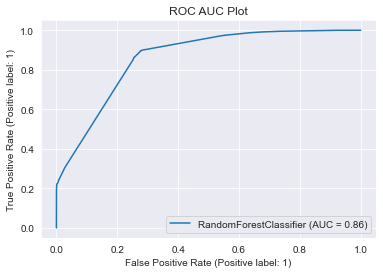

In [116]:
plot_roc_curve(grid_search.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

#### Confusion matrix

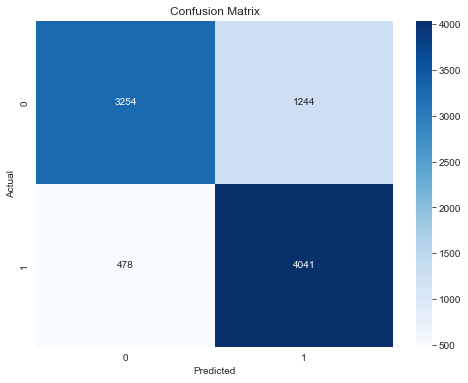

In [117]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Save Model

In [118]:
joblib.dump(grid_search.best_estimator_,"Census_Income.pkl")

['Census_Income.pkl']

# PROJECT COMPLETED

#### Submitted By: Amit Kumar